In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd
from collections import Counter
! pip install networkx
! pip install plotly
! pip install colorlover

In [0]:
import networkx as nx

In [4]:
link ='https://drive.google.com/open?id=1p7wjO3x6TItoZbN8avEtYoIg1MMVy8T2'
fluff, id = link.split('=')
print (id)

1p7wjO3x6TItoZbN8avEtYoIg1MMVy8T2


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('tweets2009-06-0115.zip')  
df = pd.read_csv('tweets2009-06-0115.zip', sep='\t', compression='zip')

In [6]:
df.head()

,date,user,tweet
0,2009-06-01 21:43:59,burtonator,No Post Title
1,2009-06-01 21:47:23,burtonator,No Post Title
2,2009-06-02 01:15:44,burtonator,No Post Title
3,2009-06-02 05:17:52,burtonator,No Post Title
4,2009-06-02 23:58:25,burtonator,No Post Title


In [0]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]

In [0]:
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [9]:
hashTagsCounter.most_common(100)

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75

# Q1

###(a)

In [0]:
youtubeTag = df[df["tweet"].str.lower().str.contains("#youtube", na=False)].copy()

In [0]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [0]:
addMentionedColumn(youtubeTag)

In [13]:
youtubeTag.shape

(617, 4)

In [0]:
def mentionGraph(df):
    g = nx.Graph()
    count=0
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
      for mentionedUser in mentionedUsers:
        count+=1
        if (user in g) and (mentionedUser in g[user]):
          g[user][mentionedUser]["numberMentions"] += 1
          
        else:
          g.add_edge(user, mentionedUser, numberMentions=1)
          
    print(count)
    return g

In [15]:
youtubeGraph = mentionGraph(youtubeTag)

246


In [16]:
print("# nodes:", len(youtubeGraph.nodes()))
print("# edges:", len(youtubeGraph.edges()))

# nodes: 271
# edges: 233


In [17]:
print(len(youtubeTag['user'].unique()))#user that does not mention anyone and not mentioned by anybody will not show up in graph
#at the same time the use who is mentioned but did not tweet anything will appear in graph as well

288


There are 271 nodes and 233 edges in the mention graph.

###(b)

In [0]:
import matplotlib.pyplot as plt

In [0]:
degrees=youtubeGraph.degree()
degreeList=list(degrees)

In [20]:
degreeList[0]

('speedy3702', 1)

In [0]:
degreeCount={}
for item in degreeList:
  if item[1] in degreeCount:
    degreeCount[item[1]]+=1
  else:
    degreeCount[item[1]]=1


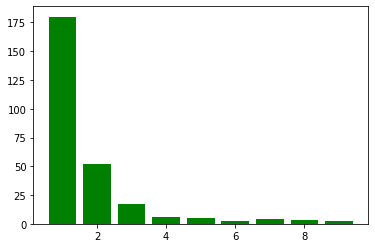

In [22]:
plt.bar(degreeCount.keys(), degreeCount.values(), color='g')
plt.show()

The majority of the nodes only has one degree and the node degree represents the connections among users, thus the nodes that have high degree tends to be the central of the social network. 

###(c)

In [23]:
d=('david',{'2':4,'van':5})
print(d[1]['2'])

4


In [0]:
mentionList=[]
#need add data=True otherwise there are only two values(u,v)
for u,v,weight in youtubeGraph.edges(data=True):
  mentionList.append((u,v,weight))
mentionList=sorted(mentionList, key=lambda x: x[2]['numberMentions'])
#sort the list of tuples by the value of third dict value

In [25]:
mentionList[-5:]

[('dabloguiman', 'avidya', {'numberMentions': 2}),
 ('dabloguiman', 'caferozella', {'numberMentions': 2}),
 ('growline', 'justkarl', {'numberMentions': 2}),
 ('kevinsoberg', 'keystroke', {'numberMentions': 2}),
 ('ossguy', "cdibona's", {'numberMentions': 3})]

###(d)

In [26]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [0]:
import colorlover as cl
from IPython.display import HTML

In [28]:
HTML(cl.to_html( cl.flipper()['seq']['3'] ))

In [0]:
red=cl.scales['3']['seq']['Reds']
red3 = cl.interp(red, 3)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)
    #generate random position for nodes

In [0]:
addRandomPositions(youtubeGraph)

In [0]:
def plotNetwork(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = go.Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=2 ,color=red3[edgeWidth-1]))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = go.Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [69]:
configure_plotly_browser_state()
plotNetwork(youtubeGraph)

#Q2

###(a)

In [35]:
import nltk
from nltk.tokenize import RegexpTokenizer
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
commonWord=[]
userList=youtubeTag['user'].unique()
userTweetDict={}
for user in userList:
  userTweets=youtubeTag.loc[youtubeTag['user']==user,'tweet']
  totalTweet=''
  for tweet in userTweets:
    totalTweet=totalTweet+' '+tweet
  userTweetDict[user]=totalTweet
utSeries = pd.Series(userTweetDict)

In [0]:
regex_link = re.compile(r'\s*(?:https?:\/\/)?[\w.-]+(?:\.[\w.-]+)+[\w\-._~:/?#[\]@!\$&\'\(\)\*\+,;=.]+', flags=re.IGNORECASE)
stop_words = set(stopwords.words('english')) 
tokenizer=RegexpTokenizer(r'\w+')
youtubeText=utSeries.str.lower().replace(regex_link,'').apply(lambda x: tokenizer.tokenize(x))
#youtubeText=youtubeText.apply(lambda x: [item for item in x if item not in stop_words])
youtubeText=youtubeText.apply(lambda x: x.remove('rt') if 'rt' in x else x)
#lambda if clause need a complete form 'else' is necessary


In [0]:
textDF=pd.DataFrame(youtubeText,columns=['text'])
for item in youtubeText:
  top3=Counter(item).most_common(3)
  '''if top3==None:
    commonWord.append(["NONE"])
    continue'''
  commonWord.append(top3)
textDF['top3']=commonWord

In [0]:
textDF['top3']=textDF['top3'].apply(lambda x: [item[0] for item in x ])

In [40]:
textDF.head()

,text,top3
unborn,"[want, to, make, a, time, link, in, youtube]","[want, to, make]"
animamundicm,"[claudia, muzio, addio, del, passato, youtube,...","[youtube, claudia, muzio]"
youtubehd,"[top, youtube, hd, zach, s, schlieffen, plan, ...","[hd, youtube, top]"
bondijunction,"[what, happens, if, you, have, way, too, much,...","[what, happens, if]"
speedy3702,None,[]


In [0]:
tweetText=textDF['text']
textCounter=Counter()
for item in tweetText:
  textCounter.update(item)

In [42]:
top20=textCounter.most_common(20)
print(top20)

[('youtube', 521), ('hd', 143), ('video', 97), ('s', 86), ('the', 83), ('new', 74), ('top', 72), ('today', 64), ('hot', 55), ('to', 50), ('trailerhd', 45), ('a', 41), ('trailer', 41), ('pop', 40), ('of', 34), ('risingvid', 28), ('rising', 28), ('i', 27), ('twitter', 27), ('2009', 25)]


From the top 20 most common words we can tell that the main theme of the tweets about youtube focus on hd videos and daily hot events or movie trailer.

###(b)

In [0]:
def plotHoverNetwork(graph,df):
    scatters=[]
    degrees=graph.degree()
    degreeList=list(degrees)
    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = go.Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=2 ,color=red3[edgeWidth-1]))
        scatters.append(s)


    count=0
    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        topText=''
        nodeDegree=0
        if node in df.index:
          count+=1
          topText=df.loc[node,'top3']
          topText=' '.join(topText)
          
          for item in degreeList:
            if item[0]==node:
              nodeDegree=item[1]
              break
        else:
          topText='No record'
          nodeDegree=1
        s = go.Scatter(
                x=[xPos], 
                y=[yPos], 
                text = 'Top3:'+topText+'Degree:'+str(nodeDegree),
                
                hoverinfo="text",
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    print(count)
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [44]:
'cwmacdon)' in youtubeGraph.nodes()

True

In [70]:
configure_plotly_browser_state()
plotHoverNetwork(youtubeGraph,textDF)

155


In the graph above, the hover information includes the top3 most common words in the tweet and also contains the node degree. Since some nodes in the graph are simply mentioned and they do not have any tweet or some tweets only contains some url links and those links are removed during the text processing steps, under these two situations the node has no hover text.

#Q3

###(a)

Closeness Centrality&Betweeness Centrality

In [0]:
from networkx.algorithms import closeness_centrality,betweenness_centrality

In [0]:
close_Cebtrality=closeness_centrality(youtubeGraph, u=None, distance=None, wf_improved=True)

In [48]:
print(close_Cebtrality)

{'speedy3702': 0.003703703703703704, 'youtubehd': 0.003703703703703704, 'mitchellmckenna': 0.003703703703703704, 'cwmacdon)': 0.003703703703703704, 'smith_cameron': 0.007407407407407408, 'pollypearson': 0.0049382716049382715, 'emccareers': 0.0049382716049382715, 'khuda1': 0.007407407407407408, 'flipbooks': 0.0049382716049382715, 'meaghery)': 0.0049382716049382715, 'justmikeyhrc': 0.003703703703703704, 'magiccitymayhem': 0.003703703703703704, 'mtlns': 0.008465608465608466, 'georch': 0.014814814814814815, 'eljerrywhite': 0.008465608465608466, 'plazanetwork)': 0.008465608465608466, 'edalgomezn': 0.01875, 'laquesefue': 0.023076923076923075, 'plazanetwork': 0.03, 'lauradark': 0.02, 'carlos__': 0.01875, 'dark_warlike': 0.01875, 'franmx': 0.016666666666666666, 'tmeister': 0.01875, 'javier_af': 0.01875, 'facso': 0.008465608465608466, 'machelino': 0.01875, 'mikepacker': 0.003703703703703704, 'mnrmg': 0.003703703703703704, 'jenocide312': 0.015123456790123457, 'deathwish808': 0.025925925925925925

In [0]:
between_centrality=betweenness_centrality(youtubeGraph)

In [50]:
print(between_centrality)

{'speedy3702': 0.0, 'youtubehd': 0.0, 'mitchellmckenna': 0.0, 'cwmacdon)': 0.0, 'smith_cameron': 2.7536830510808205e-05, 'pollypearson': 0.0, 'emccareers': 0.0, 'khuda1': 2.7536830510808205e-05, 'flipbooks': 0.0, 'meaghery)': 0.0, 'justmikeyhrc': 0.0, 'magiccitymayhem': 0.0, 'mtlns': 0.0, 'georch': 0.00016522098306484924, 'eljerrywhite': 0.0, 'plazanetwork)': 0.0, 'edalgomezn': 9.178943503602735e-06, 'laquesefue': 0.00020652622883106153, 'plazanetwork': 0.0005645050254715682, 'lauradark': 3.671577401441094e-05, 'carlos__': 9.178943503602735e-06, 'dark_warlike': 0.0, 'franmx': 0.0, 'tmeister': 9.178943503602735e-06, 'javier_af': 9.178943503602735e-06, 'facso': 0.0, 'machelino': 9.178943503602735e-06, 'mikepacker': 0.0, 'mnrmg': 0.0, 'jenocide312': 0.0, 'deathwish808': 0.0005231997797053559, 'adam_walters': 0.0, 'sogeshirts': 0.0, 'beshirthappy': 0.0, 'ethanjaynes': 0.0, 'regretful': 0.0, 'famouslv': 2.7536830510808205e-05, 'ytgt': 0.0, "famouslv's": 0.0, 'imaginedpm': 0.0, 'oliksi': 0.0

###(b)

In [0]:
def plotNetworkSize(graph,centrality):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=centrality[node]*500,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [52]:
configure_plotly_browser_state()
plotNetworkSize(youtubeGraph,close_Cebtrality)

In [53]:
HTML(cl.to_html( cl.flipper()['seq']['9'] ))

In [54]:
ybr=cl.scales['9']['seq']['YlOrBr']
ybr3 = cl.interp(ybr, 9)
HTML(cl.to_html(ybr3))

In [0]:
def plotNetworkColor(graph,centrality):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=2 ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        c=0
        if centrality[node]==0:
          c=0
        
        if centrality[node]>0 and centrality[node]<0.5:
          c=4
        if centrality[node]>0.5 and centrality[node]<1:
          c=6
        if centrality[node]>1:
          c=9


        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color=ybr3[c],          
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [56]:
configure_plotly_browser_state()
plotNetworkColor(youtubeGraph,between_centrality)

###(c)

In [0]:
import operator

In [0]:
close_Cebtrality=sorted(close_Cebtrality.items(),key=operator.itemgetter(1))
between_centrality=sorted(between_centrality.items(),key=operator.itemgetter(1))

In [0]:
top_Close=close_Cebtrality[-10:]
top_Between=between_centrality[-10:]

In [60]:
print(top_Close)
print(top_Between)

[('jsbond', 0.03109935332157554), ('growline', 0.03160095579450418), ('zaibatsu', 0.03160095579450418), ('smoshian', 0.03201058201058201), ('brian8907', 0.03265432098765432), ('dabloguiman', 0.03333333333333333), ('phabi', 0.03562289562289562), ('boraz', 0.03681917211328976), ('hugobiwan', 0.03696715583508036), ('ozuckan', 0.037678062678062674)]
[('keystroke', 0.0011565468814539446), ('boraz', 0.0011657258249575474), ('smoshian', 0.0014319151865620266), ('brian8907', 0.0014502730735692323), ('dabloguiman', 0.001597136169626876), ('phabi', 0.0017944834549543346), ('hugobiwan', 0.0021144351999370587), ('jdscolam', 0.0021754096103538483), ('growline', 0.0029464408646564778), ('ozuckan', 0.0034558722291064296)]


The results shared many common items, compare the two I suppose the betweeness centrality is better because it calculate the centrality based on paths that went through it, while closeness measure on shortest path that can only reveal the access efficiency

#Q4

###(a)

In [0]:
from networkx.algorithms.clique import find_cliques

In [0]:
numClique=list(find_cliques(youtubeGraph))

In [63]:
numClique

[['', 'wisdomismisery'],
 ['meringer', 'iforia'],
 ['rakidd', 'brneyesuss'],
 ['freshzweinull', 'michael_sauer'],
 ['robertashley', 'tole_cover'],
 ['saltyproduction', 'dfizzy'],
 ['katgib', 'joemescher'],
 ['sandragaspar', 'ocean_raven'],
 ['sandragaspar', 'stopthedictato'],
 ['critter8875', 'edtroy'],
 ['stanwong27', 'filmclassics'],
 ['jslefanu', 'brneyesuss'],
 ['jamesakersjr', 'fleetadmiralj'],
 ['kopfkribbeln', 'm8b_'],
 ['potent_one', 'mynumberone1988'],
 ['grmon', 'fraeulein_m'],
 ['elocio', 'justmepammy'],
 ['smosh', 'thamesstreet'],
 ['smosh', 'bensstudio'],
 ['youtubehd', 'speedy3702'],
 ['annschilling', 'worldlistener'],
 ['oscargodson', 'jaytheblogger'],
 ['vasalisa', 'dabloguiman'],
 ['mmefaerie', 'wisdomismisery'],
 ['carltonhoytphd', 'boraz'],
 ['carltonhoytphd', 'manymanypeople'],
 ['carltonhoytphd', 'maverickny'],
 ['tole_cover', 'shawnelliott'],
 ['svejk', 'corinnamilborn'],
 ['svejk', 'akisamexamaya'],
 ['justinvincent', 'undisco'],
 ['jacobdiggle', 'danawalker'],
 

In [64]:
len(numClique)

208

In [65]:
maxClique=0
for item in numClique:
  cliqueLength=len(item)
  if cliqueLength>maxClique:
    maxClique=cliqueLength

print(maxClique)

3


In [0]:
nodeClique={}
for item in youtubeGraph.nodes:
  for clique in numClique:
    if item in clique:
      if item in nodeClique.keys():
        nodeClique[item]+=1
      else:
        nodeClique[item]=1

In [67]:
nodeClique

{'': 1,
 '4dogz': 1,
 '_vinyltap': 1,
 'adam_walters': 1,
 'adamtube': 1,
 'akisamexamaya': 1,
 'amberrl': 1,
 'annschilling': 1,
 'arturs': 1,
 'avidya': 2,
 'avmeyer': 2,
 'aznasser': 1,
 'banolka': 1,
 'barbarahauck': 2,
 'beaugiles)': 1,
 'bennybtl': 1,
 'bensstudio': 2,
 'beshirthappy': 1,
 'betterbizideas': 1,
 'boraz': 8,
 'bostonmarketer': 1,
 'brian8907': 6,
 'brianbee': 1,
 'brneyesuss': 3,
 'bubbaloox3': 1,
 'buckybit': 1,
 'buthaina': 4,
 'cafepressmemaws': 2,
 'caferozella': 3,
 'carlos__': 2,
 'carltonhoytphd': 3,
 'cdibona': 1,
 "cdibona's": 1,
 'charlieprofit': 1,
 'chikatze': 1,
 'cleomorgause': 1,
 'clung': 3,
 'cnnfail': 1,
 'cole2026': 2,
 'colearchambault': 1,
 'conceptionblog': 1,
 'copakennet': 2,
 'corinnamilborn': 1,
 'crashover': 1,
 'critter8875': 1,
 'culinaryculture': 1,
 'cwmacdon)': 1,
 'dabloguiman': 6,
 'danawalker': 2,
 'danineteen': 1,
 'dark_warlike': 1,
 'dcfemella': 1,
 'deathwish808': 5,
 'debra47': 1,
 'delsquacho': 1,
 'derwebarchitekt': 2,
 'df

In [68]:
nodeLargest={}
for node in youtubeGraph.nodes:
  for clique in numClique:
    if node in clique:
      length=len(clique)
      if node in nodeLargest.keys():
        
        nodeLargest[node]=max(length,nodeLargest[node])
      else:
        nodeLargest[node]=length
print(nodeLargest)

{'speedy3702': 2, 'youtubehd': 2, 'mitchellmckenna': 2, 'cwmacdon)': 2, 'smith_cameron': 2, 'pollypearson': 2, 'emccareers': 2, 'khuda1': 2, 'flipbooks': 2, 'meaghery)': 2, 'justmikeyhrc': 2, 'magiccitymayhem': 2, 'mtlns': 2, 'georch': 2, 'eljerrywhite': 2, 'plazanetwork)': 2, 'edalgomezn': 2, 'laquesefue': 2, 'plazanetwork': 3, 'lauradark': 3, 'carlos__': 2, 'dark_warlike': 3, 'franmx': 2, 'tmeister': 2, 'javier_af': 2, 'facso': 2, 'machelino': 2, 'mikepacker': 2, 'mnrmg': 2, 'jenocide312': 3, 'deathwish808': 3, 'adam_walters': 3, 'sogeshirts': 2, 'beshirthappy': 3, 'ethanjaynes': 3, 'regretful': 2, 'famouslv': 2, 'ytgt': 2, "famouslv's": 2, 'imaginedpm': 2, 'oliksi': 2, 'delsquacho': 2, 'michael_sauer': 2, 'freshzweinull': 2, 'scottmonaco': 2, 'mediapost)': 2, 'twitt_consult': 2, 'conceptionblog': 2, 'bennybtl': 2, 'swichi293': 2, '4dogz': 2, 'avmeyer': 2, 'jrea': 2, 'warholreject': 2, 'lanicew88': 2, 'theskorpion': 2, 'makael86': 2, 'misstp90': 2, 'sweetaddictions': 2, 'brianbee': 2

###(b)

The largest clique has the size of 3, and it stands for the size of a group people whom are connected from each other. From the size of the largest maximal clique containing each given node, we can see that the majority of the network nodes only contain a max clique of size two, which means people like to mention only one people in one tweet instead of many people.
